# Variant frequencies

This analysis aimed to determine the frequency distribution of genetic variants within African populations for chosen genes of interest

To answer this question, the following steps were performed: 

1. Data Generation: Genetic variation data was generated from genetic information obtained from the [GnomAD 1000 Genomes and HGDP datasets](https://gnomad.broadinstitute.org/news/2021-10-gnomad-v3-1-2-minor-release/) for African population groups.
2. Data Preparation: The generated genetic variation data was processed and prepared for analysis following the steps detailed in the `Notebooks\Data_preparation\2-IH_allele_counts.ipynb` Jupyter notebook. The resulting prepared data included variant positional information, allele counts, and frequencies, which are stored in the `Data\Processed\IH_allele_counts.csv` file. Additionally, metadata on the individuals from which genetic variation data was generated, was prepared and stored in the `Sample_populations.csv` file. 
3. Data Filtering: Variant allele count and frequency data from the `Data\Processed\IH_allele_counts.csv` file was filtered to include only summarised/grouped data for individuals of recent African origin, excluding African Americans and African Caribbeans.
4. Data Grouping: Divide variant allele frequencies into quantiles and group the data by allele frequency quantiles.
5. Data Visualisation: To gain an understanding of the frequencies of variants within different genes of interest, a stacked barplot was generated. This plot shows the variant count for each gene and illustrates the distribution of variants within different frequency bins. 

## Imports

Notebook setup

In [1]:
import os
import sys

from dotenv import load_dotenv

load_dotenv()

PROJECT_ROOT = os.getenv("PROJECT_ROOT")
if PROJECT_ROOT not in sys.path:
    os.chdir(PROJECT_ROOT + "/Notebooks")
    sys.path.append(PROJECT_ROOT)

import numpy as np
import pandas as pd
import seaborn as sns
import upsetplot
from matplotlib import pyplot as plt
import Utils.constants as constants
import Utils.functions as functions

Import sample population data 

In [2]:
sample_subpopulations = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Sample_populations.csv",
    )
).drop(columns="Unnamed: 0")

sample_subpopulations.tail(5)

,SUB,SAMPLE_NAME,REG
984,African American,NA20412,ASW
985,Mandenka,SS6004470,WA
986,Mbuti Pygmy,SS6004471,CA
987,San,SS6004473,SA
988,HGDP Yoruba,SS6004475,WA


Import sub-population allele count data

In [3]:
ih_allele_counts = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "IH_allele_counts.csv",
    )
).drop(columns=["Unnamed: 0"])

ih_allele_counts.head(5)

,VAR_NAME,POS,REF,ALT,GENE,SUB_POP,IH_ALT_CTS,IH_TOTAL_CTS,ID,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS,CORR_IH_AF,REG,VARIANT_TYPE
0,chr13:110148882C-CT,110148882,C,CT,COL4A1,African Caribbean,0,228,110148882_CT_C,228,228,0.0,ACB,INDEL
1,chr13:110148882C-CT,110148882,C,CT,COL4A1,HGDP Yoruba,0,42,110148882_CT_C,42,42,0.0,WA,INDEL
2,chr13:110148882C-CT,110148882,C,CT,COL4A1,Mandenka,0,46,110148882_CT_C,46,46,0.0,WA,INDEL
3,chr13:110148882C-CT,110148882,C,CT,COL4A1,Esan,0,296,110148882_CT_C,296,296,0.0,WA,INDEL
4,chr13:110148882C-CT,110148882,C,CT,COL4A1,Bantu Kenya,0,24,110148882_CT_C,24,24,0.0,EA,INDEL


Import variant type and consequence data

In [4]:
variant_type_data = pd.read_csv(
    os.path.join(
        PROJECT_ROOT,
        "Data",
        "Processed",
        "Variant_consequences.csv",
    ),
    usecols=[
        "ID",
        "REF",
        "ALT",
        "POS",
        "GENE",
        "CONSEQUENCE",
        "CONSEQUENCE_CLASSIFICATION",
    ],
)

variant_type_data.head(5)

,ID,POS,REF,ALT,CONSEQUENCE,GENE,CONSEQUENCE_CLASSIFICATION
0,chr13:110148882C-CT,110148882,C,CT,downstream_gene_variant,COL4A1,upstream/downstream
1,rs552586867,110148891,C,G,downstream_gene_variant,COL4A1,upstream/downstream
2,rs59409892,110148917,C,G,downstream_gene_variant,COL4A1,upstream/downstream
3,rs535182970,110148920,G,C,downstream_gene_variant,COL4A1,upstream/downstream
4,rs56406633,110148959,A,G,downstream_gene_variant,COL4A1,upstream/downstream


## Data filtering

Retain summarised/grouped data for individuals of recent African origin. Exclude data for African Americans and African Caribbeans. 

In [5]:
ih_recent_afr = ih_allele_counts[
    (ih_allele_counts.REG == "Recent African") & ~(ih_allele_counts.IH_ALT_CTS == 0)
]

## Data grouping

Divide allele frequencies into quantiles

In [6]:
ih_recent_afr["QUANTILE"] = pd.cut(
    ih_recent_afr["CORR_IH_AF"],
    [0.0, 0.001, 0.005, 0.05, 0.5, 1.0],
    labels=[
        "< 0.001",
        "0.001-0.005",
        "0.005-0.05",
        "0.05-0.5",
        "> 0.5",
    ],
)
ih_recent_afr.head()

C:\Users\User\AppData\Local\Temp\ipykernel_11420\2334041436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ih_recent_afr["QUANTILE"] = pd.cut(


,VAR_NAME,POS,REF,ALT,GENE,SUB_POP,IH_ALT_CTS,IH_TOTAL_CTS,ID,CORR_IH_TOTAL_CTS,CORR_IH_REF_CTS,CORR_IH_AF,REG,VARIANT_TYPE,QUANTILE
29,rs552586867,110148891,C,G,COL4A1,NaN,2,1608,110148891_G_C,1608,1606,0.005714,Recent African,SNP,0.005-0.05
33,rs59409892,110148917,C,G,COL4A1,NaN,152,1608,110148917_G_C,1608,1456,1.106859,Recent African,SNP,NaN
203,rs546124548,110149176,T,A,COL4A1,NaN,1,1608,110149176_A_T,1608,1607,0.003378,Recent African,SNP,0.001-0.005
351,rs139916479,110149349,G,A,COL4A1,NaN,7,1608,110149349_A_G,1608,1601,0.081208,Recent African,SNP,0.05-0.5
387,rs552877576,110149494,C,T,COL4A1,NaN,2,1608,110149494_T_C,1608,1606,0.005682,Recent African,SNP,0.005-0.05


Group data by quantile and gene

In [7]:
ih_recent_afr_binned_grouped = (
    functions.group_and_count(
        data=ih_recent_afr[["QUANTILE", "GENE", "ID"]],
        group_columns=["QUANTILE", "GENE"],
    )
    .reset_index()
    .rename(columns={"ID": "COUNT"})
)
ih_recent_afr_binned_grouped.tail(5)

,QUANTILE,GENE,COUNT
55,> 0.5,IL6,10
56,> 0.5,MTHFR,41
57,> 0.5,NOS3,39
58,> 0.5,OLIG2,2
59,> 0.5,TNF,4


In [8]:
# Pivot data before plotting

ih_recent_afr_binned_pivot = ih_recent_afr_binned_grouped.pivot(
    index="GENE", columns="QUANTILE", values="COUNT"
)
ih_recent_afr_binned_pivot.head(5)

# Temp fix - replace values of 0 with 0.001 - to allow correct labelling of barplot values

ih_recent_afr_binned_pivot = ih_recent_afr_binned_pivot.replace(0, 0.001)

## Data visualisation

Set plot parameters

In [9]:
sns.set(rc={"figure.figsize": (10, 8)})  # set plot size

plt.rc("font", size=constants.MEDIUM_FONT)  # controls default text sizes
plt.rc("axes", titlesize=constants.MEDIUM_FONT)  # fontsize of the axes title
plt.rc("axes", labelsize=constants.BIGGER_FONT)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("ytick", labelsize=constants.MEDIUM_FONT)  # fontsize of the tick labels
plt.rc("legend", fontsize=constants.MEDIUM_FONT)  # legend fontsize
plt.rc("figure", titlesize=constants.BIGGER_FONT)  # fontsize of the figure title

Generate barplot of quantile counts per gene

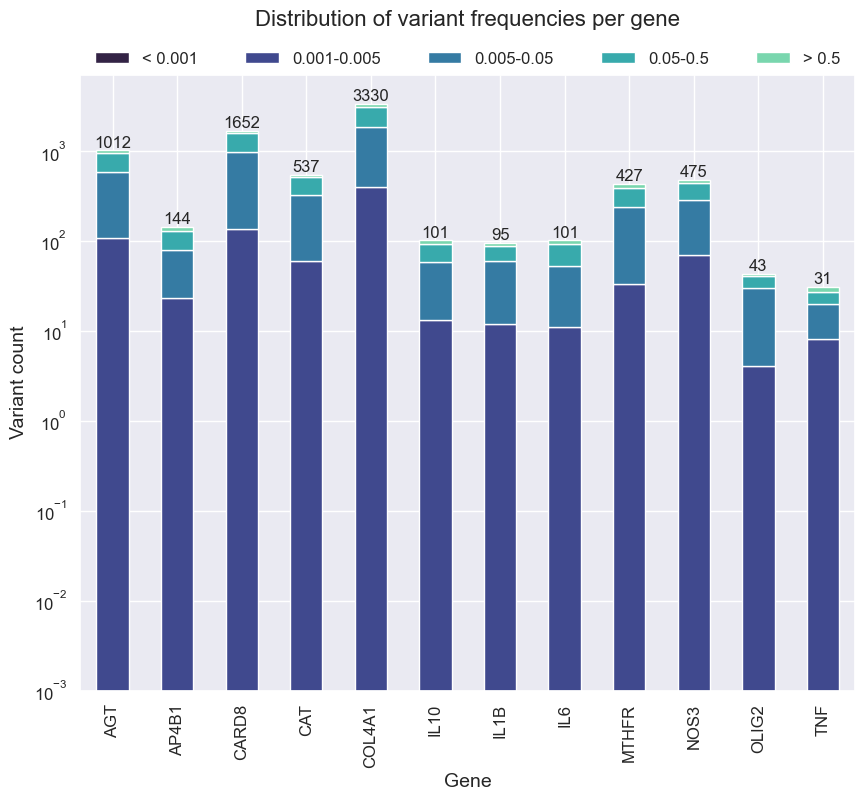

In [34]:
af_barplot = functions.create_plot(
    plot_type="stacked_barplot",
    data=ih_recent_afr_binned_pivot,
    palette=sns.set_palette("mako", 5),
    xlabel="Gene",
    ylabel="Variant count",
    plot_title=None,
)

af_barplot.bar_label(af_barplot.containers[4], fmt="%.0f")
plt.legend(
    loc="upper center",
    frameon=False,
    bbox_to_anchor=(0.0, 0.96, 1.0, 0.102),
    mode="expand",
    ncol=5,
)

plt.yscale("log")

plt.title(
    "Distribution of variant frequencies per gene", size=constants.LARGEST_FONT, pad=35
)

plt.savefig("..\Results\Figures\Variant_frequencies.png", dpi=1200)
plt.show()